# NLTK Chapter 4

## Writing Structured Programs

*The html version of this chapter in the NLTK book is available [here](https://www.nltk.org/book/ch04.html#exercises "Ch04 Exercises").*

### 4.11   Exercises

In [1]:
import nltk, re, pprint



###### 1. 

☼ Find out more about sequence objects using Python's help facility. In the interpreter, type `help(str)`, `help(list)`, and `help(tuple)`. This will give you a full list of the functions supported by each type. Some functions have special names flanked with underscore; as the help documentation shows, each such function corresponds to something more familiar. For example `x.__getitem__(y)` is just a long-winded way of saying `x[y]`.

In [1]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

In [2]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

In [3]:
help(tuple)

Help on class tuple in module builtins:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |

##### 2. 

☼ Identify three operations that can be performed on both tuples and lists. Identify three list operations that cannot be performed on tuples. Name a context where using a list instead of a tuple generates a Python error.

*Operations that can be performed on both tuples and lists:*

In [7]:
print([x for x in dir(list) if x in dir(tuple)], end = '')

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'count', 'index']

*Operations that can be performed on lists, but not tuples:*

In [13]:
print([x for x in dir(list) if x not in dir(tuple)], end = '')

['__delitem__', '__iadd__', '__imul__', '__reversed__', '__setitem__', 'append', 'clear', 'copy', 'extend', 'insert', 'pop', 'remove', 'reverse', 'sort']

*Trying to use a list as a key in a dictionary will not work, but it's possible with a tuple:*

In [16]:
a = ("Snugglebunnies")
b = ["Basselopes"]

c = {a: "N"}

*Saved as markdown because having a cell that throws an error will cause my notebook to go higgledy piddledy:*

```
c = {b: "N"}

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-17-ee5632d64820> in <module>
----> 1 c = {b: "N"}

TypeError: unhashable type: 'list'
```

*This is because tuples are hashable, but lists are not:*

In [18]:
hash(a)

6857707573350195552


```
hash(b)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-19-ad85d8b55702> in <module>
----> 1 hash(b)

TypeError: unhashable type: 'list'
        
```

##### 3. 

☼ Find out how to create a tuple consisting of a single item. There are at least two ways to do this.

*Add a common after a single value, or create a list with a single value, and use `tuple` to convert this.*

In [20]:
x = 1, 

type(x)

tuple

In [26]:
x = tuple([1])
type(x)

tuple

##### 4. 

☼ Create a list `words = ['is', 'NLP', 'fun', '?']`. Use a series of assignment statements (e.g. `words[1] = words[2]`) and a temporary variable `tmp` to transform this list into the list `['NLP', 'is', 'fun', '!']`. Now do the same transformation using tuple assignment.

In [27]:
words = ['is', 'NLP', 'fun', '?']
tmp = words[0]
words[0] = words[1]
words[1] = tmp
words[3] = '!'
words

['NLP', 'is', 'fun', '!']

In [28]:
words = ['is', 'NLP', 'fun', '?']
words[1], words[0], words[3] = words[0], words[1], "!"
words

['NLP', 'is', 'fun', '!']

##### 5.

☼ Read about the built-in comparison function `cmp`, by typing `help(cmp)`. How does it differ in behavior from the comparison operators?

*`cmp` has been deprecated.  Get with the times, authors!*

```
help(cmp)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-29-6cc5f65683db> in <module>
----> 1 help(cmp)

NameError: name 'cmp' is not defined
```

##### 6. 

☼ Does the method for creating a sliding window of n-grams behave correctly for the two limiting cases: $n$ = 1, and $n$ = `len(sent)`?

*No.  $n$ = 1 will just return __unigrams__, i.e., the individual words which comprised the sentence.  $n$ = `len(sent)` will just return the entire list:*

In [30]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 1
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The'], ['dog'], ['gave'], ['John'], ['the'], ['newspaper']]

In [31]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
>>> n = len(sent)
>>> [sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave', 'John', 'the', 'newspaper']]

##### 7.

☼ We pointed out that when empty strings and empty lists occur in the condition part of an `if` clause, they evaluate to `False`. In this case, they are said to be occurring in a Boolean context. Experiment with different kind of non-Boolean expressions in Boolean contexts, and see whether they evaluate as `True` or `False`.

*With the exception of 0, all numbers evaluate as True.  Even `float('Inf')`, `-float('Inf')`, and `float('NaN')`. All strings evaluate as True, except for the empty string. Empty lists and tuples will evaluate as False.  `None` evaluates as false, but `None` in a list or a tuple evaluates as True.*

In [44]:
cands = [0, 1, -1, float('Inf'), -float('Inf'), float('NaN'), "0", "1", "", [], 
         "Fahrvergnügen", 3.1415, None, [None], tuple([]), tuple([None])]

for c in cands:
    if c:
        print("{} evaluates as True".format(c))
    else:
        print("{} evaluates as False".format(c))

0 evaluates as False
1 evaluates as True
-1 evaluates as True
inf evaluates as True
-inf evaluates as True
nan evaluates as True
0 evaluates as True
1 evaluates as True
 evaluates as False
[] evaluates as False
Fahrvergnügen evaluates as True
3.1415 evaluates as True
None evaluates as False
[None] evaluates as True
() evaluates as False
(None,) evaluates as True


##### 8. 

☼ Use the inequality operators to compare strings, e.g. `'Monty' < 'Python'`. What happens when you do `'Z' < 'a'`? Try pairs of strings which have a common prefix, e.g. `'Monty' < 'Montague'`. Read up on "lexicographical sort" in order to understand what is going on here. Try comparing structured objects, e.g. `('Monty', 1) < ('Monty', 2)`. Does this behave as expected?

*In lexicographical sort, only the first index in both items is compared.  Since 'M' comes before 'P', the rest of the string is ignored.*

In [45]:
'Monty' < 'Python'

True

In [53]:
'M' < 'Python'

True

In [54]:
'Monty' < 'P'

True

*Uppercase letters are considered as coming 'before' lowercase ones.*

In [46]:
'Z' < 'a'

True

*'Monty' and 'Montague' have the same first four elements.  Since 'y' comes after 'a', the comparison evaluates as `False`.*

In [47]:
'Monty' < 'Montague'

False

*As the first elements in both tuples are identical, the second element is compared, and one is indeed less than 2.*

In [51]:
('Monty', 1) < ('Monty', 2)

True

*Carrying on that logic a bit further:*

In [52]:
('Monty', 1, 1, 1, 5) < ('Monty', 1, 1, 1, 4)

False

##### 9.

☼ Write code that removes whitespace at the beginning and end of a string, and normalizes whitespace between words to be a single space character.

* 1. do this task using `split()` and `join()`
* 2. do this task using regular expression substitutions

In [58]:
sent = "    this    is   a really inconsistent          use  of     whitespace.      "
sent = sent.split()
' '.join(sent)

'this is a really inconsistent use of whitespace.'

In [68]:
sent = "    this    is   a really inconsistent          use  of     whitespace.      "
sent = re.sub(r'^\s*|\s*$', '', sent)
sent = re.sub(r'\s+', ' ', sent)
sent

'this is a really inconsistent use of whitespace.'

##### 10.

☼ Write a program to sort words by length. Define a helper function `cmp_len` which uses the `cmp` comparison function on word lengths.

*`cmp` is still deprecated, so I'll only do the first part of this exercise.*

In [77]:
def sort_words_by_length(text):
    """
    Returns a list, sorted from shortest to longest,
    of words in text.
    """
    
    return [w for _, w in sorted([(len(w), w) for w in text.split()])]

In [79]:
sent = 'the words in this sentence are mostly of unique character lengths'

print(sort_words_by_length(sent), end = '')

['in', 'of', 'are', 'the', 'this', 'words', 'mostly', 'unique', 'lengths', 'sentence', 'character']

##### 11.

◑ Create a list of words and store it in a variable `sent1`. Now assign `sent2 = sent1`. Modify one of the items in `sent1` and verify that `sent2` has changed.

* a. Now try the same exercise but instead assign `sent2 = sent1[:]`. Modify sent1 again and see what happens to `sent2`. Explain.
* b. Now define `text1` to be a list of lists of strings (e.g. to represent a text consisting of multiple sentences. Now assign `text2 = text1[:]`, assign a new value to one of the words, e.g. `text1[1][1] = 'Monty'`. Check what this did to `text2`. Explain.
* c. Load Python's `deepcopy()` function (i.e. `from copy import deepcopy`), consult its documentation, and test that it makes a fresh copy of any object.

In [94]:
sent = "Mairzy doats and dozy doats and liddle lamzy divey " \
        "A kiddley divey too, wouldn't you?"
sent1 = sent.split()
sent2 = sent1
sent1[0] = "Mares"
print(sent2, end = '')

['Mares', 'doats', 'and', 'dozy', 'doats', 'and', 'liddle', 'lamzy', 'divey', 'A', 'kiddley', 'divey', 'too,', "wouldn't", 'you?']

*__a.__ Using `[:]` causes `sent1` to be shallow copied, so changes aren't replicated in `sent2`.  I.e., it's a reference to a copy of the list, and not the original list.*

In [95]:
sent = "Mairzy doats and dozy doats and liddle lamzy divey " \
        "A kiddley divey too, wouldn't you?"
sent1 = sent.split()
sent2 = sent1[:]
sent1[0] = "Mares"
print(sent2, end = '')

['Mairzy', 'doats', 'and', 'dozy', 'doats', 'and', 'liddle', 'lamzy', 'divey', 'A', 'kiddley', 'divey', 'too,', "wouldn't", 'you?']

*__b.__ Now the change is permeated.  It appears a shallow copy of a list of lists is just a copy of the references of the lists.  I.e., if one of the original lists is changed, the changed is reflected.*

In [88]:
sentA = "Mairzy doats and dozy doats and liddle lamzy divey"
sentB = "A kiddley divey too, wouldn't you?"

text1 = [sentA.split(), sentB.split()]
text2 = text1[:]

text1[1][1] = 'Monty'

print(text2, end = '')

[['Mairzy', 'doats', 'and', 'dozy', 'doats', 'and', 'liddle', 'lamzy', 'divey'], ['A', 'Monty', 'divey', 'too,', "wouldn't", 'you?']]

*If we explicitly make shallow copies of the lists in the list of lists, then the changes won't be replicated:*

In [91]:
sentA = "Mairzy doats and dozy doats and liddle lamzy divey"
sentB = "A kiddley divey too, wouldn't you?"

text1 = [sentA.split(), sentB.split()]
text2 = [text1[0][:], text1[1][:]]

text1[1][1] = 'Monty'

print(text2, end = '')

[['Mairzy', 'doats', 'and', 'dozy', 'doats', 'and', 'liddle', 'lamzy', 'divey'], ['A', 'kiddley', 'divey', 'too,', "wouldn't", 'you?']]

*__c.__*

In [96]:
from copy import deepcopy

sent = "Mairzy doats and dozy doats and liddle lamzy divey " \
        "A kiddley divey too, wouldn't you?"
sent1 = sent.split()
sent2 = deepcopy(sent1)
sent1[0] = "Mares"
print(sent2, end = '')

['Mairzy', 'doats', 'and', 'dozy', 'doats', 'and', 'liddle', 'lamzy', 'divey', 'A', 'kiddley', 'divey', 'too,', "wouldn't", 'you?']

##### 12. 

◑ Initialize an $n$-by-$m$ list of lists of empty strings using list multiplication, e.g. `word_table = [[''] * n] * m`. What happens when you set one of its values, e.g. `word_table[1][2] = "hello"`? Explain why this happens. Now write an expression using `range()` to construct a list of lists, and show that it does not have this problem.

In [99]:
m, n = 6, 7

word_table = [[''] * n] * m
pprint.pprint(word_table)

[['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '']]


In [106]:
word_table[1][2] = ("hello")
pprint.pprint(word_table)

[['', '', 'hello', '', '', '', ''],
 ['', '', 'hello', '', '', '', ''],
 ['', '', 'hello', '', '', '', ''],
 ['', '', 'hello', '', '', '', ''],
 ['', '', 'hello', '', '', '', ''],
 ['', '', 'hello', '', '', '', '']]


*Above we have a copy of a list containing sublists. When we make a change to one of the sublists, the copy is replicated in all of the lists which have been created by copying it.*

In [109]:
word_table = [['' for i in range(n)] for j in range(m)]
pprint.pprint(word_table)

[['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '']]


In [110]:
word_table[1][2] = ("hello")
pprint.pprint(word_table)

[['', '', '', '', '', '', ''],
 ['', '', 'hello', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '']]


*In this case, we're creating a brand new empty string for each of the iterations through $n$, and likewise through $m$.  As the strings are not copies of each other, changes in one are not reflected in the others.*

##### 13. 

◑ Write code to initialize a two-dimensional array of sets called `word_vowels` and process a list of words, adding each word to `word_vowels[l][v]` where `l` is the length of the word and `v` is the number of vowels it contains.

*If we follow the instructions literally and create an array of sets, both sets will come back sorted, and it is very likely that the $n$th item in the first set will not be the same as the $n$th item in the second.  I.e., a long word without many vowels would be represented towards the end of the first set, but towards the beginning of the second (and vice versa):*

In [126]:
def find_length_word_number_vowels(text):
    """
    Returns an array of two sets.  The first set comprises
    the lengths of the words.  The second the number of vowels.
    For the sake of simplicity, 'y' is not counted as a vowel.
    Results are ordered from smallest to greatest.
    """
    
    word_vowels = [set(), set()]

    for t in text:
        word_vowels[0].add(len(t))
        word_vowels[1].add(sum([1 for i in t if i.lower() in 'aeiou']))

    return word_vowels

In [136]:
test = ["supercalifragilisticexpialidocious", "eye", "Hawai'i", "draft"]
find_length_word_number_vowels(test)

[{3, 5, 7, 34}, {1, 2, 4, 16}]

*Using lists instead of sets will obviate this problem:*

In [331]:
def find_length_word_number_vowels_by_order_of_appearance(text):
    """
    Returns an array of two lists.  The first set comprises
    the lengths of the words.  The second the number of vowels.
    For the sake of simplicity, 'y' is not counted as a vowel.
    Results are ordered by order of appearance of the original
    word.
    """
    
    word_vowels = [[], []]

    for t in text:
        word_vowels[0].append(len(t))
        
        # taking advantage of the fact that `True` evaluates to 1
        word_vowels[1].append(sum([1 for i in t if i.lower() in 'aeiou']))

    return word_vowels

In [137]:
find_length_word_number_vowels_by_order_of_appearance(test)

[[34, 3, 7, 5], [16, 2, 4, 1]]

##### 14. 

◑ Write a function `novel10(text)` that prints any word that appeared in the last 10% of a text that had not been encountered earlier.

In [216]:
def novel10(text):
    """
    Returns a set of words that appear for the first time
    in the last 10% of a text.
    """

    split = int(len(text) * .9)
    first90, last10 = text[:split], text[split:]
    novel90 = set(first90)

    return set([i for i in last10 if i not in novel90])

In [212]:
from urllib import request
from nltk import word_tokenize

# Mary Shelley's Frankenstein
url = 'http://www.gutenberg.org/cache/epub/42324/pg42324.txt'

frank = request.urlopen(url).read().decode('utf8')


In [213]:
frank = word_tokenize(frank)

# used trial and error (and `index`) to find and remove
# header and footer
frank = frank[115:90732]

*Converted results to a list so that I could use slicing to get the first 20 items:*

In [217]:
print(list(novel10(frank))[:20], end = '')

['torch', 'later', 'wasting', '6375', 'lessening', 'Black', '2d', 'piercing', 'renounce', 'mole-hills', 'indecision', 'Cold', 'asseverations', 'irremediable', 'mutilated', 'repast', 'abortion', 'unquenched', 'rustling', 'boils']

##### 15.

◑ Write a program that takes a sentence expressed as a single string, splits it and counts up the words. Get it to print out each word and the word's frequency, one per line, in alphabetical order.

*Although it's not best practice stylistically, the instructions say to print everything, so I'm going to do that instead of returning a value:*

In [275]:
import nltk
from nltk import word_tokenize

def print_words_and_frequency(text):
    """
    Counts the words in a text and prints out the
    resulting table in alphabetical order.
    """

    # tokenizer separates words from punctuation
    tokens = word_tokenize(text)
    
    # remove punctuation
    words = [t.lower() for t in tokens if t.isalpha()]
    
    # get word counts from FreqDist
    ordered = sorted(set([(w, v) for w, v in nltk.FreqDist(words).items()]))
    
    # get widths for pretty printing
    # width of longest word
    width = max([len(w) for w, _ in ordered]) + 2
    # width of longest number
    width_counts = max([len(str(v)) for _, v in ordered])
    
    # print everything
    for w, v in ordered:
        print("{}:{}{:>{}}".format(w, ' ' * (width - len(w)), 
                                     v, width_counts))

In [272]:
test = "If police police police police, who polices the police police? " \
       "Police police police police police police."

print_words_and_frequency(test)

if:        1
police:   12
polices:   1
the:       1
who:       1


In [273]:
test = "How much wood would a woodchuck chuck if a woodchuck could chuck wood?"
print_words_and_frequency(test)

a:          2
chuck:      2
could:      1
how:        1
if:         1
much:       1
wood:       2
woodchuck:  2
would:      1


##### 16.

◑ Read up on Gematria, a method for assigning numbers to words, and for mapping between words having the same number to discover the hidden meaning of texts (cf. [here](http://en.wikipedia.org/wiki/Gematria "Wikipedia entry"), or [here](http://essenes.net/gemcal.htm "Gematria")).

* a. Write a function `gematria()` that sums the numerical values of the letters of a word, according to the letter values in `letter_vals`:

``` 	
>>> letter_vals = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':80, 'g':3, 'h':8,
... 'i':10, 'j':10, 'k':20, 'l':30, 'm':40, 'n':50, 'o':70, 'p':80, 'q':100,
... 'r':200, 's':300, 't':400, 'u':6, 'v':6, 'w':800, 'x':60, 'y':10, 'z':7}
```

* b. Process a corpus (e.g. `nltk.corpus.state_union`) and for each document, count how many of its words have the number 666.

* c. Write a function `decode()` to process a text, randomly replacing words with their Gematria equivalents, in order to discover the "hidden meaning" of the text.

In [305]:
letter_vals = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':80, 'g':3, 'h':8,
       'i':10, 'j':10, 'k':20, 'l':30, 'm':40, 'n':50, 'o':70, 'p':80, 'q':100,
       'r':200, 's':300, 't':400, 'u':6, 'v':6, 'w':800, 'x':60, 'y':10, 'z':7}

def gematria(word, vals = letter_vals):
    """
    Returns Gematria value of a word.
    
    Arguments:
    
    word: Word to be converted.
    vals: Dictionary of values for each letter.
          Default is `letter_vals`.
    """
    
    return sum(vals[w.lower()] for w in word if w in vals)

*__b.__*

In [329]:
su = nltk.corpus.state_union

# for pretty printing later
width = max([len(u[5:-4]) for u in su.fileids()])

devil_words = [sum([1 for w in su.words(u) if gematria(w) == 666]) for u in su.fileids()]

In [330]:
for u, w in zip(su.fileids(), devil_words):
    print(u[:4], u[5:-4] + ":" +
          " " * (width - len(u[5:-4])),  "{:>2}".format(w))

1945 Truman:      2
1946 Truman:     20
1947 Truman:      1
1948 Truman:      3
1949 Truman:      2
1950 Truman:      1
1951 Truman:      0
1953 Eisenhower:  1
1954 Eisenhower:  6
1955 Eisenhower:  5
1956 Eisenhower:  1
1957 Eisenhower:  2
1958 Eisenhower:  5
1959 Eisenhower:  1
1960 Eisenhower:  5
1961 Kennedy:     0
1962 Kennedy:     4
1963 Johnson:     0
1963 Kennedy:     3
1964 Johnson:     1
1965 Johnson-1:   0
1965 Johnson-2:   0
1966 Johnson:     0
1967 Johnson:     2
1968 Johnson:     3
1969 Johnson:     0
1970 Nixon:       0
1971 Nixon:       1
1972 Nixon:       0
1973 Nixon:       1
1974 Nixon:       0
1975 Ford:        0
1976 Ford:        3
1977 Ford:        0
1978 Carter:      1
1979 Carter:      2
1980 Carter:      0
1981 Reagan:      4
1982 Reagan:      0
1983 Reagan:      2
1984 Reagan:      1
1985 Reagan:      1
1986 Reagan:      1
1987 Reagan:      1
1988 Reagan:      2
1989 Bush:        2
1990 Bush:        2
1991 Bush-1:      0
1991 Bush-2:      0
1992 Bush:        3


*__c.__ Since strings are immutable, we need to convert whatever format the `text` is in to a list. From there, we have several ways to choose words at random.  I originally chose $n$% of the index values at random and replaced those words.  But this was very slow with large texts, as the interpreter would have to traverse the entire list of words to find the word to be replaced.  I settled on the method below, which is much quicker: The interpreter only goes through the list of words once, and returns a random number between 0.0 and 1.0 for each word.  If the random number is below a certain threshold, the word is replaced.  With this method, there is a decent chance that the percentage of words replaced will differ from the percentage we specify, since the chances of one word being replaced are independent of all other words (i.e., as long as the threshold is not 0% or 100%, there's a chance that none of the words will be replaced, and also a chance that all of the words will be replaced).  Also, punctuation will never be replaced, since these marks don't have values in the dictionary `letter_vals`, which we use in the `gematria` function.*

*Also using a function I used in [Chapter 2](https://github.com/Sturzgefahr/Natural-Language-Processing-with-Python-Analyzing-Text-with-the-Natural-Language-Toolkit/tree/master/Chapter%2002 "Chapter 2 Exercises") - `join_punctuation` - to reattach punctuation that was separated during tokenizing*

In [484]:
import random, nltk
from nltk import word_tokenize

def join_punctuation(text, characters = ["'", '’', ')', ',', '.', ':', ';', '?', '!', ']', "''"]): 
    """
    Takes a list of strings and attaches punctuation to
    the preceding string in the list.
    """
    
    text = iter(text)
    current = next(text)

    for nxt in text:
        if nxt in characters:
            current += nxt
        else:
            yield current
            current = nxt
            

    yield current

def decode(text, n = 10):
    """
    Returns a copy of the original text with n percent
    of the words converted into its gematria form.
    
    Arguments:
    
    text: Text can be any form. Will be converted into a list.
    n:    Percentage of the words to be converted.  Should be
          an integer between 0 and 100.   
    """
    
    
    # convert a cp of text into a list
    if type(text) == str:
        # use tokenize to separate punctuation from words
        cp = word_tokenize(text)    
    elif type(text) == list:
        cp = text[:]    
    else:
        cp = list(text[:])
        

    # go through the words in the list,
    # and return a random number;
    # if the random number is less than the percentage
    # replace the word with its gematria value
    for i in range(len(cp)):
        if random.random() <= n/100: 
            cp[i] = str(gematria(cp[i]))
        
    
    # using join punctuation to rejoin punctuation separated during
    # tokenizing
    return ' '.join(join_punctuation(cp))

In [487]:
decode("This is just a test to see if my code will work", 25)

'318 is just a 1105 to 310 90 my code 870 work'

In [488]:
decode(su.words('2006-GWBush.txt'), 33)[:1000]

"0 GEORGE W 0 0' S 0 BEFORE A JOINT SESSION OF THE CONGRESS 0 0 STATE OF 0 UNION January 0 0 0 THE PRESIDENT: Thank you all. Mr. 311, Vice President Cheney, members 150 Congress, members 150 the Supreme 676 55 diplomatic corps, distinguished guests 0 55 1015 785 0 Today our nation lost a beloved, graceful, courageous woman 878 73 America to 710 founding ideals and 423 on a 157 250 0 Tonight we are comforted 12 the 163 of a 38 391 1218 the husband who 1101 476 so long ago 0 and we are 725 for the 147 life 150 Coretta 873 63. ( 502 .) President George W 0 Bush reacts to applause during his State of 413 Union Address at the 591, Tuesday, Jan. 0, 0. White 381 photo by 213 707 time I' 40 485 to this 1216, I' 40 humbled 12 413 privilege 0 55 mindful of the history we 0 11 360 1091. 5 have 626 under 718 591 dome in moments of national mourning and national 533. We 20 520 America through one of the 810 consequential periods of our history -- and it 309 been 50 honor 470 serve 1218 86. In a sys

In [489]:
decode(nltk.corpus.gutenberg.words('austen-emma.txt'), 30)[:1000]

"0 81 by Jane Austen 0 0 VOLUME I CHAPTER I Emma 533, handsome, clever 0 55 rich, with 1 comfortable home and happy disposition 0 seemed 470 471 some of the 707 blessings of existence; and 13 lived nearly twenty - one 516 in the world 1218 very little to 1519 270 71 her 0 She 1101 the youngest of the two daughters of a 810 affectionate, 558 father; and 13, in consequence 150 her sister' s marriage, 62 mistress of his 389 from 1 221 early period. Her 723 had 23 540 153 74 for 213 470 have more 459 an indistinct remembrance of her caresses; and 213 place had been supplied 12 an excellent woman as 939 0 878 had 196 little 978 of a 723 in affection 0 530 years had Miss Taylor been 60 Mr. Woodhouse' s 171, less as 1 939 459 a friend, very 204 150 480 daughters, but particularly of Emma. Between _them_ 410 was 315 the 524 of sisters 0 Even 362 Miss Taylor 13 ceased to hold the nominal office of 939, the mildness of 213 temper 13 hardly allowed her to impose 61 restraint 0 and 413 1183 150 11

##### 17. 

◑ Write a function `shorten(text, n)` to process a text, omitting the $n$ most frequently occurring words of the text. How readable is it?

*The texts are usually quite readable if we delete the most common words, as most of these common words will be stop words.  However, in news articles and novels some of the most common words will be the names of the principals, and without those it's impossible to know who's doing what.*

In [479]:
import nltk, re

def join_punctuation(text, characters = ["'", '’', ')', ',', '.', ':', ';', '?', '!', ']', "''"]): 
    """
    Takes a list of strings and attaches punctuation to
    the preceding string in the list.
    """
    
    text = iter(text)
    current = next(text)

    for nxt in text:
        if nxt in characters:
            current += nxt
        else:
            yield current
            current = nxt
            

    yield current


def shorten(text, n):
       
    # convert a cp of text into a list
    if type(text) == str:
        # use tokenize to separate punctuation from words
        cp = word_tokenize(text)    
    elif type(text) == list:
        cp = text[:]    
    else:
        cp = list(text[:])
        
    # get a list of most common words, and strip away the counts
    most_common = [w for w, _ in nltk.FreqDist(w for w in cp if w.isalpha()).most_common(n)]
    
    # replace most common words
    for i in range(len(cp)):
        if cp[i] in most_common:
            cp[i] = ''
    
    # join list and normalize whitespace - 
    # otherwise there'll be gaps for the missing words
    # also use join_punctuation to reattach punctuation 
    # separate during tokenizing
    return re.sub(r'\s+', ' ', ' '.join(join_punctuation(cp)))
        
        

In [480]:
shorten("This is a test which is a rather short one", 1)

'This a test which a rather short one'

In [491]:
shorten(su.words('2006-GWBush.txt'), 50)[:1000]

"PRESIDENT GEORGE W. BUSH' S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION January 31, 2006 THE PRESIDENT: Thank . Mr. Speaker, Vice President Cheney, members Congress, members Supreme Court diplomatic corps, distinguished guests, fellow citizens: Today lost beloved, graceful, courageous woman called its founding ideals carried noble dream. Tonight comforted hope glad reunion husband was taken so long ago, grateful good life Coretta Scott King. ( .) President George W. Bush reacts applause during his State Union Address Capitol, Tuesday, Jan. 31, 2006. White House photo Eric DraperEvery time ' m invited rostrum, ' m humbled privilege, mindful history ' ve seen together. gathered under Capitol dome moments national mourning national achievement. served through one most consequential periods history -- been my honor serve . system two parties, two chambers, two elected branches, there always differences debate. But even tough debates conducted civil tone, diffe

In [492]:
shorten(nltk.corpus.gutenberg.words('austen-emma.txt'), 50)[:1000]

"[ Jane Austen 1816] VOLUME CHAPTER Woodhouse, handsome, clever, rich, comfortable home happy disposition, seemed unite some best blessings existence; lived nearly twenty - one years world little distress or vex . youngest two daughters most affectionate, indulgent father; , consequence sister' marriage, mistress house early period. Her mother died too long ago more than an indistinct remembrance caresses; place supplied an excellent woman governess, who fallen little short mother affection. Sixteen years Taylor . Woodhouse' family, less governess than friend, fond both daughters, particularly . Between _them_ more intimacy sisters. Even before Taylor ceased hold nominal office governess, mildness temper hardly allowed impose restraint; shadow authority being now long passed away, they living together friend friend mutually attached, doing just what liked; highly esteeming Taylor' judgment, directed chiefly own. The real evils, indeed, ' situation power having rather too much own way, 

*If we delete an additional 50 common words, we'll lose mentions of "Woodhouse", one of the principal characters.*

In [493]:
shorten(nltk.corpus.gutenberg.words('austen-emma.txt'), 100)[:1000]

"[ Austen 1816] VOLUME CHAPTER , handsome, clever, rich, comfortable home happy disposition, seemed unite some best blessings existence; lived nearly twenty - years world distress vex . youngest two daughters most affectionate, indulgent father; , consequence sister' marriage, mistress house early period. Her mother died too long ago indistinct remembrance caresses; place supplied excellent woman governess, fallen short mother affection. Sixteen years Taylor . ' family, less governess friend, fond both daughters, particularly . Between _them_ intimacy sisters. Even before Taylor ceased hold nominal office governess, mildness temper hardly allowed impose restraint; shadow authority long passed away, living together friend friend mutually attached, doing just liked; highly esteeming Taylor' judgment, directed chiefly . real evils, indeed, ' situation power having rather too way, disposition too ; these disadvantages threatened alloy many enjoyments. danger, however, present unperceived, 

##### 18.

◑ Write code to print out an index for a lexicon, allowing someone to look up words according to their meanings (or pronunciations; whatever properties are contained in lexical entries).

*I'm a little confused by this question, since the notion of lexicon indexing was not introduced in the book, nor is it such a common concept (i.e., googling it doesn't bring up that many hits).*
 
*From the best that I can understand, the idea is that we make a list of all items in lexicon $X$ with quality $Y_1$, all items with $Y_2$, and so on until we get to all items with $Y_n$.*

*If we used the CMU Pronouncing Dictionary for this, the first index would be for words with the phoneme `AA0`, the next for words with `AA1`, and so on until we get to the last phoneme, `Y` (cf. [here](http://www.speech.cs.cmu.edu/cgi-bin/cmudict?in=C+M+U+Dictionary "CMU dictionary") for more information).*

*It's difficult to see how we could do this with anything other than a Python dictionary, which really haven't been covered in much detail.  A Python dictionary can create an index of all the phonemes of the 133,737 words in a matter of seconds.*"
   

In [2]:
entries = nltk.corpus.cmudict.entries()

In [3]:
# number of entries in the dictionary

len(entries)

133737

*The dictionary uses the method `setdefault`, whose syntax I find quite twisted.  Regardless, the method creates a new item for phonemes it hasn't yet seen, and adds values for items that already exist.*"
   

In [4]:
d = {}

for word, pronunciation in entries:
        for phoneme in pronunciation:
            # create item if it doesn't exist
            # if it does exist, add current word
            d.setdefault(phoneme, []).append(word)

*There are 70 phonemes in this dictionary.  There are 39 basic phonemes, but the vowels have multiple forms, depending where the stress lies.*"
   

In [5]:
sum([1 for x in d.items()])

70

<i>Now I'll create a function that will find all items in the lexicon that have some specified properties.  We need at least one property to match (that of `arg1`), but we can use an unlimited number of additional properties, thanks to the `*args` argument.  From there, we'll use set intersections to find only those items which have all the specified properties.</i>"
   

In [6]:
def find_all_entries(d, arg1, *args):
        """
        Returns a set of words using the phonemes
        in arg1 and args.
        
        Arguments:
        
        d:    A dictionary of items.
        arg1: The first index to be match.
        args: Optional 2nd - nth indices to be matched.
        """
        
        rest = set(d[arg1])
        for a in args:
            rest = rest.intersection(set(d[a]))
        
        return rest

In [7]:
find_all_entries(d, 'AE2', 'B', 'D', 'IH0', 'K')

{'abdication',
 'abstracted',
 'ambidextrous',
 'backhanded',
 'bradycardia',
 'broadcasting',
 "broadcasting's",
 'bundesbank',
 "bundesbank's",
 'creditbank',
 'middenstandsbank'}

*I'd like to do a sanity check to make sure my code is working correctly.  Finding pronunciations for specific words in the CMU dictionary is not so straight-forward, so I've made a function for this.  I'll check just two words, since I still have to verify everything manually:*"
   

In [8]:
def get_pronuncation(corpus, target):
        """
        Return pronunciation for target in corpus.
        """
            
        return [pronunciation for word, pronunciation in corpus if word == target]
   

In [9]:
get_pronuncation(entries, 'abstracted')

[['AE1', 'B', 'S', 'T', 'R', 'AE2', 'K', 'T', 'IH0', 'D']]

In [10]:
get_pronuncation(entries, 'bundesbank')

[['B', 'UH1', 'N', 'D', 'IH0', 'S', 'B', 'AE2', 'NG', 'K'],
 ['B', 'AA1', 'N', 'D', 'IH0', 'S', 'B', 'AE2', 'NG', 'K'],
 ['B', 'UH1', 'N', 'D', 'IH0', 'S', 'B', 'AA2', 'NG', 'K']]

In [11]:
from nltk.corpus import wordnet as wn

*It takes a little longer to make a comparable dictionary of WordNet entries, but it's still possible.*
   

In [14]:
d2 = {}
    
for ss in wn.all_synsets():
    for word in ss.definition().split():
        word = re.sub(r"[`'();,]", "", word)
        d2.setdefault(word, []).append(ss.name())
   

In [27]:
find_all_entries(d2, "able", "person")

{'jack_of_all_trades.n.01', 'writer.n.02'}

*Sanity check:*

In [34]:
for x in sorted(find_all_entries(d2, "able", "person")):
    print("* " + wn.synset(x).definition())

* a person able to do a variety of different jobs acceptably well
* a person who is able to write and has written something


In [22]:
find_all_entries(d2, "sound", "instrument")

{'bellows.n.01',
 'blow.v.11',
 'brassy.a.01',
 'clavichord.n.01',
 'cymbal.n.01',
 'kazoo.n.01',
 "kundt's_tube.n.01",
 'organ.n.05',
 'percussion_instrument.n.01',
 'rain_stick.n.01',
 'scat.n.01',
 'sounding_board.n.02',
 'stringed_instrument.n.01',
 'strum.v.01',
 'tootle.n.01',
 'vibraphone.n.01',
 'whistle.n.03',
 'wind_instrument.n.01'}

*Sanity check:*

In [35]:
for x in sorted(find_all_entries(d2, "sound", "instrument")):
    print("* " + wn.synset(x).definition())

* a mechanical device that blows a strong current of air; used to make a fire burn more fiercely or to sound a musical instrument
* play or sound a wind instrument
* resembling the sound of a brass instrument
* an early stringed instrument like a piano but with more delicate sound
* a percussion instrument consisting of a concave brass disk; makes a loud crashing sound when hit with a drumstick or when two are struck together
* a toy wind instrument that has a membrane that makes a sound when you hum into the mouthpiece
* a measuring instrument used to measure the speed of sound
* wind instrument whose sound is produced by means of pipes arranged in sets supplied with air from a bellows and controlled from a large complex musical keyboard
* a musical instrument in which the sound is produced by one object striking another
* a percussion instrument that is made from a dried cactus branch that is hollowed out and filled with small pebbles and capped at both ends; makes the sound of falli

In [23]:
find_all_entries(d2, "electricity", "device")

{'battery.n.02',
 'conductor.n.04',
 'electrical_device.n.01',
 'electromechanical_device.n.01',
 'electrostatic_generator.n.01'}

*Sanity check:*

In [36]:
for x in sorted(find_all_entries(d2, "electricity", "device")):
    print("* " + wn.synset(x).definition())

* a device that produces electricity; may have several primary or secondary cells arranged in parallel or series
* a device designed to transmit electricity, heat, etc.
* a device that produces or is powered by electricity
* a mechanical device that is operated by electricity
* electrical device that produces a high voltage by building up a charge of static electricity


##### 19.

◑ Write a list comprehension that sorts a list of WordNet synsets for proximity to a given synset. For example, given the synsets `minke_whale.n.01`, `orca.n.01`, `novel.n.01`, and `tortoise.n.01`, sort them according to their `shortest_path_distance()` from `right_whale.n.01`.

In [10]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

whales = [orca, minke, tortoise, novel]

In [16]:
sorted(set([(right.path_similarity(w), w) for w in whales]), reverse = True)

[(0.25, Synset('lesser_rorqual.n.01')),
 (0.16666666666666666, Synset('killer_whale.n.01')),
 (0.07692307692307693, Synset('tortoise.n.01')),
 (0.043478260869565216, Synset('novel.n.01'))]

*Note the alternate names for __minke__ and __orca__:*

In [17]:
print(minke, orca, sep = '\n')

Synset('lesser_rorqual.n.01')
Synset('killer_whale.n.01')


##### 20. 

◑ Write a function that takes a list of words (containing duplicates) and returns a list of words (with no duplicates) sorted by decreasing frequency. E.g. if the input list contained 10 instances of the word `table` and 9 instances of the word `chair`, then `table` would appear before `chair` in the output list.

In [28]:
def sort_list_by_frequency(t):
    return sorted(set([(w) for w, _ in nltk.FreqDist(t).items()]), 
                  reverse = True)

In [21]:
test = []
for i in range(9):
    test.append("chair")
for i in range(10):
    test.append("table")

print(test, end = " ")

['chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'table', 'table', 'table', 'table', 'table', 'table', 'table', 'table', 'table', 'table'] 

In [29]:
sort_list_by_frequency(test)

['table', 'chair']

##### 21.

◑ Write a function that takes a text and a vocabulary as its arguments and returns the set of words that appear in the text but not in the vocabulary. Both arguments can be represented as lists of strings. Can you do this in a single line, using `set.difference()`?

*The instructions explicitly say that we only need a single line and the arguments are lists of strings.  However, considering all the advice given in this chapter, I would strongly recommend programming "defensively" and adding checks to make sure that the arguments are indeed lists.*

*Here's what the function would look like as one line:*

In [54]:
def return_vocab_not_in_text(text, vocab):
    """
    Returns strings in text but not in vocab.
    
    Arguments:
    
    text:  A list of strings.
    vocab: A list of strings.
    """
    return set(text).difference(set(vocab))

*If we program defensively and try to envision every combination of `str`, `set`, or `list`, we'd end up with a much longer function.*

In [102]:
from nltk import word_tokenize

def return_vocab_not_in_text(text, vocab):
    """
    Returns strings in text but not in vocab.
    
    Arguments:
    
    text:  A list of strings, a set of strings, or a string.
    vocab: A list of strings, a set of strings, or a string.
    """
    
    # if text and vocab are some combination of set and list
    if isinstance(text, set) and isinstance(vocab, set):
        return text.difference(vocab)
    elif isinstance(text, list) and isinstance(vocab, set):
        return set(text).difference(vocab)
    elif isinstance(text, set) and isinstance(vocab, list):
        return text.difference(set(vocab))
    
    # if text is a str
    if type(text) == str:
        text = word_tokenize(text)
    else:
        assert isinstance(text, 
                          list), "Argument `text` must be a list or a string"
    
    # if vocab is a str
    if type(vocab) == str:
        vocab = word_tokenize(vocab)
    else:
        assert isinstance(vocab, 
                          list), "Argument `vocab` must be a list or a string"

    return set(text).difference(set(vocab))

In [73]:


deep_thought = ("When I was a kid my favorite relative was Uncle Caveman. " 
                "After school we'd all go play in his cave, "
                "and every once in a while he would eat one of us. " 
                "It wasn't until later that I found out that Uncle Caveman "
                "was a bear.")

# convert deep_thought to a list

dt_words = word_tokenize(deep_thought)

In [59]:
vocab =  ["'d", 'was', '.', 'play', 'school', 'favorite', 'found',  
          'kid', 'all', 'once', 'Caveman', 'Uncle', 'cave', 
          'while', 'relative', "n't", 'until', 'out', 'we', 'a', 'my', 
          'After', 'that', 'every', 'later', 'and', 'go', 'in', 'of', 
          'one', 'bear', 'When', 'would', 'eat']

In [82]:
return_vocab_not_in_text(dt_words, vocab)

{',', 'I', 'It', 'he', 'his', 'us'}

In [98]:
return_vocab_not_in_text(deep_thought, vocab)

{',', 'I', 'It', 'he', 'his', 'us'}

In [103]:
return_vocab_not_in_text(set(dt_words), vocab)

{',', 'I', 'It', 'he', 'his', 'us'}

##### 22.

◑ Import the `itemgetter()` function from the operator module in Python's standard library (i.e. `from operator import itemgetter`). Create a list `words` containing several words. Now try calling: `sorted(words, key=itemgetter(1))`, and `sorted(words, key=itemgetter(-1))`. Explain what `itemgetter()` is doing.

In [114]:
from operator import itemgetter

words = ['my', 'list', 'of', 'several', 'words']

*`itemgetter(n)` retrieves the item at index position `n`. In the below examples, the list `word` is sorted by the key at index `n`.*

In [116]:
sorted(words, key = itemgetter(0))

['list', 'my', 'of', 'several', 'words']

In [115]:
sorted(words, key = itemgetter(1))

['several', 'of', 'list', 'words', 'my']

In [108]:
sorted(words, key = itemgetter(-1))

['a', 'of', 'several', 'words', 'list']

*If the above examples were not clear, the tuple below should be easier to follow:*

In [117]:
test = [('A', 'Beta', 3), ('C', 'Alpha', 2), ('B', 'Gamma', 1)]
sorted(test, key = itemgetter(0))

[('A', 'Beta', 3), ('B', 'Gamma', 1), ('C', 'Alpha', 2)]

In [118]:
sorted(test, key = itemgetter(1))

[('C', 'Alpha', 2), ('A', 'Beta', 3), ('B', 'Gamma', 1)]

In [119]:
sorted(test, key = itemgetter(2))

[('B', 'Gamma', 1), ('C', 'Alpha', 2), ('A', 'Beta', 3)]

##### 23. 

◑ Write a recursive function `lookup(trie, key)` that looks up a key in a trie, and returns the value it finds. Extend the function to return a word when it is uniquely determined by its prefix (e.g. `vanguard` is the only word that starts with `vang-`, so `lookup(trie, 'vang')` should return the same thing as `lookup(trie, 'vanguard'))`.

*I tried to use recursion as much as possible when solving this question.  I was able to do this for the first part of the question - simple lookup of a word in the tree; but I had some problems when I tried to expand this so that we could find words solely by their prefix.  If a word was uniquely determined by its prefix - as per the example in the question - then I was able to return the value solely through recursion. However, for non-unique prefixes, there would be several potential matches, but this function would only return the first, without notifying the user that there were other possible matches. I found this of limited practical usage, since an end user would probably not be aware if a prefix was unique or not. I therefore expanded the function even more so that it output all possible final values.  To tackle this final problem I had to resort to a non-recursive method - namely, a second function that would handle the special case of non-unique prefixes.  As far as I am aware, it would not be possible to do this entirely recursively.*

*The function `insert` from chapter 4 in the NLTK book:*

In [288]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [289]:
trie = {}

en = ["vandalism", "vandalize", "vane", "vanguard", "vanilla", "vanish", 
      "vanity"]
fr = ["vandalisme", "vandaliser", "girouette", "avant-garde", "vanille", 
      "disparaître", "vanité"]

[insert(trie, e, f) for e, f in zip(en, fr)];

In [4]:
pprint.pprint(trie, width = 50)

{'v': {'a': {'n': {'d': {'a': {'l': {'i': {'s': {'m': {'value': 'vandalisme'}},
                                           'z': {'e': {'value': 'vandaliser'}}}}}},
                   'e': {'value': 'girouette'},
                   'g': {'u': {'a': {'r': {'d': {'value': 'avant-garde'}}}}},
                   'i': {'l': {'l': {'a': {'value': 'vanille'}}},
                         's': {'h': {'value': 'disparaître'}},
                         't': {'y': {'value': 'vanité'}}}}}}}


*The original version of the function that I wrote.  It looks up a key and returns its value:*

In [337]:
# original

def lookup(trie, word):
    """
    Looks up the value of a word in a trie.
    """
    
    if len(word) == 1:
        return trie[word]     
    first, rest = word[0], word[1:]
    if first not in trie:
        return False
    return lookup(trie[first], rest)


In [338]:
lookup(trie, 'vane')

{'value': 'girouette'}

In [340]:
lookup(trie, 'vanish')

{'value': 'disparaître'}

In [348]:
# test - word not in trie

lookup(trie, 'error')

False

*The expanded version is able to handle portions of keys, as long as those portions are unique to a specific key.  Otherwise, the function merely returns the first value to match that portion of a key.*

In [341]:
# expanded version - returns the value for complete words and unique suffixes

def lookup(trie, word):
    """
    Looks up the value of a word in a trie.
    Word can be a complete word of just a prefix, i.e., 
    beginning of the string.  Function will only return the 
    first match for non-unique prefixes.
    """
    
    if len(word) == 1:
        keys = list(trie[word].keys())
        if keys[0] == 'value':
            return trie[word].values()
        else:
            for k in keys:
                return lookup(trie[word], k)

    first, rest = word[0], word[1:]
    if first not in trie:
        return False
    return lookup(trie[first], rest)


In [342]:
lookup(trie, 'vang')

dict_values(['avant-garde'])

In [343]:
lookup(trie, 'vanil')

dict_values(['vanille'])

*The final version is able to handle non-unique portions of keys, but resorts to a helper function to do this.  Therefore, it is not entirely recursive:*

In [344]:
# semi-recursive version; able to handle non-unique prefixes

def get_final_value(trie, word):
    """
    Retrieves the final value of word
    in a trie.
    """
    if len(word) == 1:
        keys = list(trie[word].keys())

        if keys[0] == 'value':
            return trie[word].values()
        else:
            for k in keys:
                return lookup(trie[word], k)     
    return results

def lookup(trie, word):
    """
    Looks up the value of a word in a trie.
    Word can be a complete word of just a prefix, i.e., 
    beginning of the string.  Function will return all 
    possible matches for non-unique prefixes.
    """
        
    if len(word) == 1:
        keys = list(trie[word].keys())
        if len(keys) > 1:
            results = []
            for k in keys:
                results.append(get_final_value(trie[word], k))
            return results
        
        if keys[0] == 'value':
            return trie[word].values()
        else:
            for k in keys:
                return lookup(trie[word], k)
            
        
    if len(word) > 1:
        
        first, rest = word[0], word[1:]
        if first not in trie:
            return False
        return lookup(trie[first], rest)

    


In [345]:
lookup(trie, 'vang')

dict_values(['avant-garde'])

In [346]:
lookup(trie, 'vand')

[dict_values(['vandalisme']), dict_values(['vandaliser'])]

##### 24.

◑ Read up on "keyword linkage" (chapter 5 of (Scott & Tribble, 2006)). Extract keywords from NLTK's Shakespeare Corpus and using the NetworkX package, plot keyword linkage networks.

*This was another question that I found to be quite vexing. Outside of this question, there is no mention of 'keyword linkage' in the book.  Furthermore, the Shakespeare Corpus is in xml format, which isn't covered until the last chapter of the book.*

*There is some example code about the Shakespeare Corpus [here](http://www.nltk.org/howto/corpus.html, "howto/corpus"), but in my opinion it's not terribly helpful.  I was only able to access the lines of the plays after I had located an [external blog](https://www.datasciencebytes.com/bytes/2014/12/30/topic-modeling-of-shakespeare-characters/ "topic modeling in Shakespeare") where someone discussed dealing with a similar problem.*

*Furthermore, even after I was able to locate a copy of Scott & Tribble, I found it quite difficult to replicate their results.  I found their discussion of keywords to be very general, and it was difficult to get the exact keywords in "Romeo & Juliet" that they had found.*

*Finally, I'm not convinced that NetworkX is the best module for this specific task.  The example in the book showed WordNet hierarchies, but the network in this example is much shallower.  The networks for this problem have a lot of nodes and only a few edges, which make for a very cluttered graph.*

*The xml text is stored in this format, making it difficult to grab text from collocational windows (i.e., 5 words before and after a keyword).*


```{xml}
<SPEECH>
<SPEAKER>BENVOLIO</SPEAKER>
<LINE>Why, Romeo, art thou mad?</LINE>
</SPEECH>
```

In [2]:
from nltk.corpus import shakespeare
from xml.etree import ElementTree
shakespeare.fileids() 


['a_and_c.xml',
 'dream.xml',
 'hamlet.xml',
 'j_caesar.xml',
 'macbeth.xml',
 'merchant.xml',
 'othello.xml',
 'r_and_j.xml']

In [374]:
personae = [persona.text for persona in
             play.findall('PERSONAE/PERSONA')]
print(personae) # doctest: +ELLIPSIS


['ESCALUS, prince of Verona. ', 'PARIS, a young nobleman, kinsman to the prince.', 'An old man, cousin to Capulet. ', 'ROMEO, son to Montague.', 'MERCUTIO, kinsman to the prince, and friend to Romeo.', 'BENVOLIO, nephew to Montague, and friend to Romeo.', 'TYBALT, nephew to Lady Capulet.', 'BALTHASAR, servant to Romeo.', "PETER, servant to Juliet's nurse.", 'ABRAHAM, servant to Montague.', 'An Apothecary. ', 'Three Musicians.', 'Page to Paris; another Page; an officer.', 'LADY MONTAGUE, wife to Montague.', 'LADY CAPULET, wife to Capulet.', 'JULIET, daughter to Capulet.', 'Nurse to Juliet. ', 'Citizens of Verona; several Men and Women, relations to both houses; Maskers, Guards, Watchmen, and Attendants.', 'Chorus.']


In [388]:
speakers = set(speaker.text for speaker in
                play.findall('*/*/*/SPEAKER'))

print(speakers, end = '')

{'SAMPSON', 'PETER', 'BENVOLIO', 'ROMEO', 'Second Servant', 'FRIAR LAURENCE', 'First Citizen', 'First Servant', 'GREGORY', 'Chorus', 'LADY CAPULET', 'JULIET', 'Nurse', 'Second Capulet', 'Servant', 'MONTAGUE', 'PRINCE', 'PAGE', 'PARIS', 'FRIAR JOHN', None, 'ABRAHAM', 'CAPULET', 'Third Watchman', 'NURSE', 'Second Musician', 'First Musician', 'Third Musician', 'Second Watchman', 'MERCUTIO', 'Musician', 'Apothecary', 'TYBALT', 'BALTHASAR', 'First Watchman', 'LADY MONTAGUE', 'LADY  CAPULET'}

*Not quite what I had wanted, but a dictionary of all lines with that mention Romeo:*

In [13]:
Romeo = {}

play = shakespeare.xml('r_and_j.xml')

from nltk import word_tokenize

for act in play.findall('ACT'):
    for scene in act.findall('SCENE'):
        for speech in scene.findall('SPEECH'):
            for line in speech.findall('LINE'):
                if 'Romeo' in str(line.text):
                    print(line.text)
                    #for word in word_tokenize(line.text):
                        #Romeo[word] = 1 + Romeo.get(word, 0)

O, where is Romeo? saw you him to-day?
It was. What sadness lengthens Romeo's hours?
This is not Romeo, he's some other where.
Why, Romeo, art thou mad?
Nay, gentle Romeo, we must have you dance.
Young Romeo is it?
'Tis he, that villain Romeo.
His name is Romeo, and a Montague;
Romeo! my cousin Romeo!
Romeo! humours! madman! passion! lover!
Romeo, that she were, O, that she were
Romeo, good night: I'll to my truckle-bed;
O Romeo, Romeo! wherefore art thou Romeo?
So Romeo would, were he not Romeo call'd,
Without that title. Romeo, doff thy name,
Henceforth I never will be Romeo.
Art thou not Romeo and a Montague?
Then say, Jove laughs. O gentle Romeo,
Three words, dear Romeo, and good night indeed.
Hist! Romeo, hist! O, for a falconer's voice,
With repetition of my Romeo's name.
Romeo!
Our Romeo hath not been in bed to-night.
Where the devil should this Romeo be?
Romeo will answer it.
Alas poor Romeo! he is already dead; stabbed with a
Here comes Romeo, here comes Romeo.
Romeo, bon jour

In [445]:
print(Romeo, end = '')

{'O': 9, ',': 113, 'where': 3, 'is': 19, 'Romeo': 125, '?': 28, 'saw': 1, 'you': 6, 'him': 8, 'to-day': 1, 'It': 2, 'was': 3, '.': 29, 'What': 1, 'sadness': 1, 'lengthens': 1, "'s": 28, 'hours': 1, 'This': 1, 'not': 10, 'he': 14, 'some': 1, 'other': 1, 'Why': 1, 'art': 5, 'thou': 11, 'mad': 1, 'Nay': 1, 'gentle': 2, 'we': 3, 'must': 2, 'have': 2, 'dance': 1, 'Young': 1, 'it': 4, "'T": 1, 'that': 12, 'villain': 2, 'His': 1, 'name': 4, 'and': 20, 'a': 10, 'Montague': 2, ';': 30, '!': 30, 'my': 14, 'cousin': 1, 'humours': 1, 'madman': 1, 'passion': 1, 'lover': 1, 'she': 3, 'were': 3, 'good': 3, 'night': 5, ':': 17, 'I': 16, "'ll": 3, 'to': 17, 'truckle-bed': 1, 'wherefore': 1, 'So': 1, 'would': 2, 'call': 1, "'d": 7, 'Without': 1, 'title': 1, 'doff': 1, 'thy': 1, 'Henceforth': 1, 'never': 1, 'will': 6, 'be': 6, 'Art': 1, 'Then': 1, 'say': 3, 'Jove': 1, 'laughs': 1, 'Three': 1, 'words': 1, 'dear': 1, 'indeed': 1, 'Hist': 1, 'hist': 1, 'for': 4, 'falconer': 1, 'voice': 1, 'With': 2, 'repeti

<i>[The blog](https://www.datasciencebytes.com/bytes/2014/12/30/topic-modeling-of-shakespeare-characters/ "Topic modeling in Shakespeare") that I referenced earlier had a method for making a dictionary where all of the characters in a play would be the keys, and all of their lines the values.  What follows below is modified code from what was found at the linked blog:<i>

In [300]:
from collections import defaultdict

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stopwords = set(nltk.corpus.stopwords.words('english'))

lines = defaultdict(list)
linecounts = defaultdict(int)

play = shakespeare.xml('r_and_j.xml')

for child in play.findall('ACT/SCENE/SPEECH'):
    speaker = child.find('SPEAKER').text
    for line in child.findall('LINE'):
        if line.text is not None:
            for word in tokenizer.tokenize(line.text):
                word_lower = word.lower()
                if word_lower not in stopwords and len(word) > 2:
                    lines[speaker].append(word_lower)
                    linecounts[speaker] += 1
                    
                    

*This is a dictionary of all the words said by Romeo, followed by their counts:*

In [311]:
romeo = {}

for w in lines["ROMEO"]:
    romeo[w] = 1 + romeo.get(w, 0)
    
from operator import itemgetter

print(sorted(romeo.items(), key = itemgetter(1), reverse = True)[:20], end = '')


[('thou', 64), ('love', 52), ('thy', 41), ('thee', 38), ('death', 22), ('juliet', 16), ('man', 15), ('fair', 15), ('night', 15), ('mine', 14), ('let', 14), ('eyes', 13), ('shall', 13), ('hath', 13), ('may', 13), ('upon', 13), ('dear', 13), ('tell', 12), ('good', 12), ('doth', 12)]

*Getting raw text from Romeo & Juliet:*

In [142]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+'*\w+")

raw_rj = []

play = shakespeare.xml('r_and_j.xml')

for line in play.findall('ACT/SCENE/SPEECH/LINE'):
    if line.text is not None:
        for word in tokenizer.tokenize(line.text):
            word_lower = word.lower()
            if word_lower not in stopwords and len(word) > 2:
                raw_rj.append(word_lower)

In [143]:
print(raw_rj[:20], end = '')

['gregory', 'word', "we'll", 'carry', 'coals', 'colliers', 'mean', 'choler', "we'll", 'draw', 'live', 'draw', 'neck', 'collar', 'strike', 'quickly', 'moved', 'thou', 'art', 'quickly']

*Getting raw text from other Shakespeare plays in this corpus:*

In [144]:
raw_others = []
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+'*\w+")

for p in shakespeare.fileids():
    # tokenize all plays EXCEPT R & J
    if p != 'r_and_j.xml':
        play = shakespeare.xml(p)
    
    
    for line in play.findall('ACT/SCENE/SPEECH/LINE'):
        if line.text is not None:
            for word in tokenizer.tokenize(line.text):
                word_lower = word.lower()
                if word_lower not in stopwords and len(word) > 2:
                    raw_others.append(word_lower)
                    
                

*One way to think of keywords is all the words in one text that do not appear in comparable texts.  Here, `rj_kw` is the set difference between all the words in "Romeo and Juliet" and all the words in the other plays in the corpus.*

In [149]:
rj_kw = set(raw_rj) - set(raw_others)

In [150]:
"romeo" in rj_kw

True

*But we should get rid of __hapax legomenon__ (words that only occur once), as well as __dis legomenon__:*

In [301]:
# get counts in raw R&J text

raw_rj_dict = {}

for w in raw_rj:
    raw_rj_dict[w] = 1 + raw_rj_dict.get(w, 0)

In [312]:
# sort the dictionary

potential_rj_keywords = sorted(raw_rj_dict.items(), key = itemgetter(1), reverse = True)

In [252]:
# keep only the words that appear more than twice

rj_keywords = [w for w, v in potential_rj_keywords if v > 2]

In [255]:
print(rj_keywords[:10])

['thou', 'thy', 'thee', 'love', 'romeo', 'shall', 'come', 'good', 'night', "i'll"]


*The method we just used above considers all words in the other plays.  Another method looks only at key words, and combines the methods used above to make a master list of keywords that appear at least twice in any one of the other plays in the corpus.*

In [295]:
from operator import itemgetter

tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+'*\w+")

# master list of keywords in all plays
raw_others_keywords = []

for p in shakespeare.fileids():
    # tokenize all plays EXCEPT R & J
    if p != 'r_and_j.xml':
        play = shakespeare.xml(p)
    
    # temporary file for all words in current play
    temp_raw = []
    
    # append all words to temp file
    for line in play.findall('ACT/SCENE/SPEECH/LINE'):
        if line.text is not None:
            for word in tokenizer.tokenize(line.text):
                word_lower = word.lower()
                if word_lower not in stopwords and len(word) > 2:
                    temp_raw.append(word_lower)
                    
    # make temporary dictionary and tally words in current play
    temp_d = {}
    for w in temp_raw:
        temp_d[w] = 1 + temp_d.get(w, 0)

    # if word occurs more than twice, add to master list
    for w, v in temp_d.items():
        if v > 2:
            raw_others_keywords.append(w)
            
# get rid of duplicates
raw_others_keywords = set(raw_others_keywords)
 

In [299]:
# substract kws from all plays from kws in R & J
rj_only_kw = set(rj_keywords) - raw_others_keywords

In [302]:
# sort by count

potential_rj_keywords = sorted(raw_rj_dict.items(), key = itemgetter(1), reverse = True)

In [313]:
# keep only those words that appear more than twice, and only in R & J

print(sorted(set(w for w,v in potential_rj_keywords if w in rj_only_kw and v >= 3)), 
      end = '')

['advanced', 'afford', 'afore', 'afternoon', 'airy', 'aloof', 'anger', "another's", 'apothecary', 'apprehend', 'aside', 'backward', "banish'd", 'banished', 'banishment', 'bark', 'bawd', 'beats', 'beauties', 'benvolio', 'beseeming', 'bite', 'blush', 'bridal', 'bride', 'bridegroom', 'brows', 'burden', 'calm', 'capulet', 'capulets', 'cease', 'cell', 'church', 'churchyard', 'closed', 'conjure', 'consort', 'contrary', 'cords', 'county', "cousin's", 'coz', 'craves', 'crow', 'date', "daughter's", 'daylight', 'deadly', "death's", 'delay', 'den', 'despised', 'discords', 'doom', 'dug', 'empty', 'envious', 'exchange', 'exile', 'fickle', 'five', 'foe', 'food', 'forsworn', 'fourteen', 'friar', 'gallant', 'gaze', 'gentlewoman', 'ghostly', 'grey', 'guests', 'hare', "hear'st", "heart's", 'heir', 'hire', 'hoar', 'hollow', 'hood', 'houses', 'inconstant', 'iron', 'jesu', 'john', 'joint', 'joints', 'joyful', 'jule', 'juliet', "juliet's", 'kinsman', 'kinsmen', 'knees', "know'st", "lady's", 'lain', 'lamb', 

*This is very close to the method described in Scott and Tribble, but my list of resulting keywords seems to be much larger.  It should be remember that Scott & Tribble used a much larger corpus of Shakespeare works.*

*Next, I tried to make a dictionary for each of the main characters, with the most common words used by each:*

In [152]:
romeo = {}

for w in lines["ROMEO"]:
    if w in rj_kw:
        romeo[w] = 1 + romeo.get(w, 0)

In [162]:
from operator import itemgetter

sorted(romeo.items(), key = itemgetter(1), reverse = True)[:10]

[('juliet', 16),
 ('mercutio', 9),
 ('tybalt', 9),
 ('romeo', 6),
 ('friar', 5),
 ('capulet', 4),
 ('banishment', 4),
 ('rosaline', 3),
 ('ghostly', 3),
 ('verona', 3)]

In [163]:
tybalt = {}

for w in lines["TYBALT"]:
    if w in rj_kw:
        tybalt[w] = 1 + tybalt.get(w, 0)

In [164]:
tybalt

{'heartless': 1,
 'benvolio': 1,
 'montagues': 1,
 'montague': 2,
 'fleer': 1,
 'romeo': 3,
 'intrusion': 1,
 'den': 1,
 'mercutio': 1,
 'afford': 1}

In [165]:
juliet = {}

for w in lines["JULIET"]:
    if w in rj_kw:
        juliet[w] = 1 + juliet.get(w, 0)

In [167]:
from operator import itemgetter

sorted(juliet.items(), key = itemgetter(1), reverse = True)[:10]

[('romeo', 41),
 ('tybalt', 14),
 ('montague', 5),
 ('friar', 4),
 ('fickle', 3),
 ('laurence', 3),
 ('pilgrim', 2),
 ('hist', 2),
 ('cave', 2),
 ('stint', 1)]

In [169]:
nurse = {}

for w in lines["NURSE"]:
    if w in rj_kw:
        nurse[w] = 1 + nurse.get(w, 0)

In [170]:
nurse

{'nobleman': 1, 'properer': 1, 'versal': 1, 'romeo': 1}

In [171]:
mercutio = {}

for w in lines["MERCUTIO"]:
    if w in rj_kw:
        mercutio[w] = 1 + mercutio.get(w, 0)

In [173]:
sorted(mercutio.items(), key = itemgetter(1), reverse = True)[:10]

[('romeo', 9),
 ('mab', 3),
 ('visor', 2),
 ('dun', 2),
 ('hazel', 2),
 ('gallops', 2),
 ('rosaline', 2),
 ('tybalt', 2),
 ('duellist', 2),
 ('passado', 2)]

In [179]:
paris = {}

for w in lines["PARIS"]:
    if w in rj_kw:
        paris[w] = 1 + paris.get(w, 0)

In [180]:
paris

{'afford': 1,
 'thursday': 3,
 'capulet': 1,
 'immoderately': 1,
 'tybalt': 1,
 'hastes': 1,
 'inundation': 1,
 'juliet': 2,
 'divorced': 1,
 'spited': 1,
 'detestable': 1,
 'churchyard': 1,
 'digging': 1,
 'wanders': 1,
 'muffle': 1,
 'haughty': 1,
 'montague': 2,
 'condemned': 1,
 'conjurations': 1,
 'felon': 1}

In [182]:
%matplotlib inline

In [200]:
rom = [w for w, _ in sorted(romeo.items(), key = itemgetter(1), reverse = True)[:10]]
jul = [w for w, _ in sorted(juliet.items(), key = itemgetter(1), reverse = True)[:10]]
tyb = [w for w, _ in sorted(tybalt.items(), key = itemgetter(1), reverse = True)[:10]]
mer = [w for w, _ in sorted(mercutio.items(), key = itemgetter(1), reverse = True)[:10]]
par = [w for w, _ in sorted(paris.items(), key = itemgetter(1), reverse = True)[:10]]

In [201]:
d = {'Romeo': rom, 'Juliet': jul, 'Tybalt': tyb, 'Mercutio': mer, 'Paris': par}

In [202]:
g = nx.DiGraph(d)

In [203]:
g.add_nodes_from(d.keys())

In [204]:
import networkx as  nx
import matplotlib.pyplot as plt

for k, v in d.items():
    g.add_edges_from(([(k, t) for t in v]))

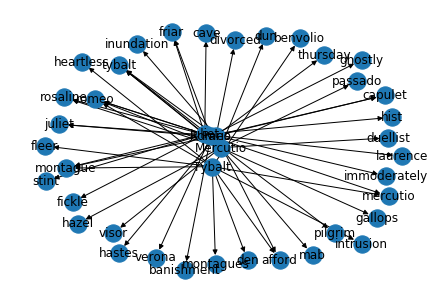

In [205]:
nx.draw(g,with_labels=True)
#plt.draw()
plt.show()

*The resulting graph isn't very helpful.  Let's use the exact keywords given in Scott & Tribble:*

In [209]:
ROMEO = ["Benvolio", "Juliet", "banished", "night", "Tybalt", "art", "dead", 
         "O", "thou", "is"]
TYBALT = ["Capulet", "dead", "kinsman", "art", "O", "Mercutio", "slain", "is", 
          "thou", "Romeo"]
JULIET =  ["she", "O", "lady", "thou", "thee", "thy", "dead", "Romeo", "Nurse"]
CAPULET = ["thee", "Friar", "Tybalt", "Juliet", "Montague", "is", "Paris", 
           "Capulet’s", "nurse", "Lady"]
NURSE = ["thy", "she", "Peter", "thee", "is", "Juliet", "Capulet", "thou", 
         "Lady", "O"]
NIGHT = ["light", "torch", "O", "she", "thy", "thee", "love", "Romeo", "thou", "is"]
MERCUTIO = ["she", "O", "kinsman", "is", "thy", "thou", "lady", "Romeo", 
            "Tybalt", "Benvolio"]
PARIS = ["Thursday", "married", "Lawrence", "Friar", "love", "is", "Romeo", 
         "dead", "Capulet", "County"]
LOVE = ["Paris", "Lady", "death", "night", "she", "thee", "thou", "is", "O", 
        "thy"]
MONTAGUE = ["thee", "Benvolio", "O", "thy", "art", "Lady", "Romeo", "thou", 
            "Capulet", "is"]
THOU = ["death", "night", "O", "love", "is", "Romeo", "thee", "wilt", "thy", 
        "art"]
FRIAR = ["Romeo", "Nurse", "Capulet", "Lady", "Mantua", "Paris", "O", "is", 
         "cell", "Lawrence"]
ROMEOS = ["she", "dead", "banished", "Romeo", "thou", "Friar", "Tybalt’s", 
          "watch", "O", "is"]
O = ["Juliet", "Friar", "she", "Nurse", "thee", "thy", "Romeo", "thou", "love", 
     "is"]

In [214]:
d2 = {'Romeo': ROMEO, 'Tybalt': TYBALT, 'Juliet': JULIET, 'Capulet': CAPULET, 'n': NURSE, 'ni': NIGHT, 
      'm': MERCUTIO, 'p': PARIS, 'l': LOVE, 'mo': MONTAGUE, 'th': THOU, 'f': FRIAR, 'rs': ROMEOS, 'o': O}

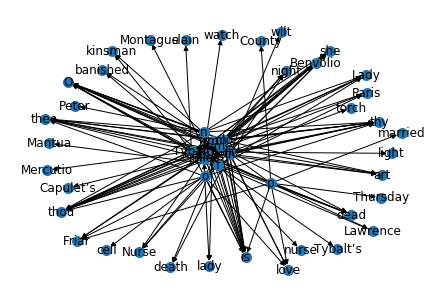

<Figure size 864x864 with 0 Axes>

In [227]:
g2 = nx.DiGraph(d2)

g2.add_nodes_from(d2.keys())


for k, v in d2.items():
    g2.add_edges_from(([(k, t) for t in v]))

nx.draw(g2, with_labels=True, node_size = 100,font_size=12)

plt.figure(figsize=(12,12)) 
plt.show()

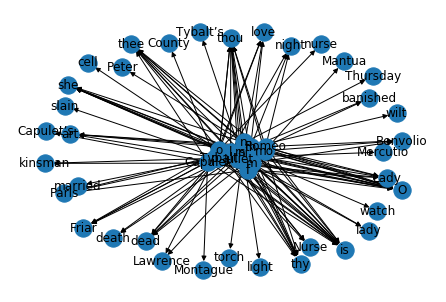

<Figure size 2160x1440 with 0 Axes>

In [228]:
g2 = nx.DiGraph(d2)

g2.add_nodes_from(d2.keys())


for k, v in d2.items():
    g2.add_edges_from(([(k, t) for t in v]))

nx.draw(g2, with_labels=True)
plt.figure(figsize=(30,20))
plt.show()

In [239]:
d3 = {'Romeo': ROMEO,  'Juliet': JULIET,  'Mercutio': MERCUTIO,  'Montague': MONTAGUE}

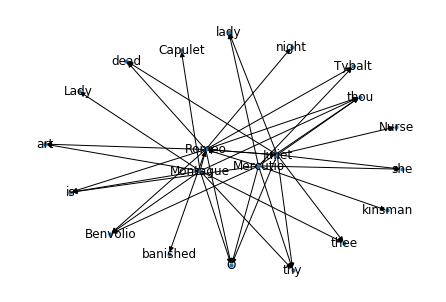

In [241]:
g3 = nx.DiGraph(d3)

g3.add_nodes_from(d3.keys())


for k, v in d3.items():
    g3.add_edges_from(([(k, t) for t in v]))

nx.draw(g3, with_labels=True, node_size = 10,font_size=12)

plt.show();

In [242]:
d4 = {'Romeo': ROMEO,  'Juliet': JULIET,  'Capulet': CAPULET, 'Nurse': NURSE, 'Paris': PARIS,}

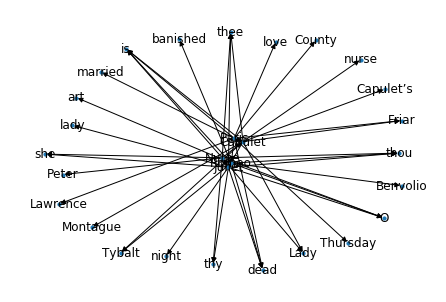

In [243]:
g4 = nx.DiGraph(d4)

g4.add_nodes_from(d4.keys())


for k, v in d4.items():
    g4.add_edges_from(([(k, t) for t in v]))

nx.draw(g4, with_labels=True, node_size = 10,font_size=12)

plt.show();

*Below was code I used to find words within a collocation window of five words before and after a mention of Romeo. To use this again, I would have to recreate a corpus where I added five empty strings before the beginning of every speaker's line.*

In [102]:
romeo_ky = [raw[i - 5 : i +5] for i in range(len(raw)) if raw[i] == "Romeo"]


In [104]:
# flatten nested list
romeo_ky = [w for sl in romeo_ky for w in sl if w not in  ('', 'Romeo')]

In [105]:
print(romeo_ky[:20], end = '')

['saw', 'day', 'Right', 'glad', 'Tut', 'lost', "he's", 'art', 'thou', 'mad', 'Nay', 'gentle', 'must', 'dance', 'Young', 'Tis', 'villain', 'name', 'Montague', 'son']

In [106]:
romeo_kyd = {}

for w in romeo_ky:
    romeo_kyd[w] = 1 + romeo_kyd.get(w, 0)

In [107]:
from operator import itemgetter

sorted(romeo_kyd.items(), key = itemgetter(1), reverse = True)
    

[('thou', 20),
 ('Tybalt', 15),
 ('dead', 14),
 ('night', 11),
 ('come', 11),
 ('art', 9),
 ('banished', 9),
 ('would', 8),
 ('slain', 7),
 ('Juliet', 7),
 ("I'll", 6),
 ('comes', 6),
 ('may', 6),
 ('thee', 6),
 ('must', 5),
 ('thy', 5),
 ('dear', 5),
 ('shall', 5),
 ('slew', 5),
 ('Paris', 5),
 ('name', 4),
 ('know', 4),
 ('bed', 4),
 ('ere', 4),
 ('man', 4),
 ('heaven', 4),
 ('open', 3),
 ('good', 3),
 ('wherefore', 3),
 ('father', 3),
 ('never', 3),
 ('yet', 3),
 ('poor', 3),
 ('young', 3),
 ('much', 3),
 ('letter', 3),
 ('Mercutio', 3),
 ('bear', 3),
 ('brave', 3),
 ("Mercutio's", 3),
 ('gone', 3),
 ('give', 3),
 ('Though', 3),
 ('cannot', 3),
 ('ever', 3),
 ('thought', 3),
 ('one', 3),
 ('word', 3),
 ('death', 3),
 ('well', 3),
 ('Hark', 3),
 ('Shall', 3),
 ('time', 3),
 ('Mantua', 3),
 ('day', 2),
 ("he's", 2),
 ('Nay', 2),
 ('gentle', 2),
 ('villain', 2),
 ('Montague', 2),
 ('cousin', 2),
 ('caetera', 2),
 ('poperin', 2),
 ('smell', 2),
 ('sweet', 2),
 ("call'd", 2),
 ('Retain',

In [93]:
tybalt_ky = [raw[i - 5 : i +5] for i in range(len(raw)) if raw[i] == "Tybalt"]


In [94]:
tybalt_ky[:3]

[['the',
  'instant',
  'came',
  'The',
  'fiery',
  'Tybalt',
  'with',
  'his',
  'sword',
  'prepared'],
 ['Signior',
  'Valentio',
  'and',
  'his',
  'cousin',
  'Tybalt',
  'Lucio',
  'and',
  'the',
  'lively'],
 ['', '', '', '', '', 'Tybalt', 'the', 'kinsman', 'of', 'old']]

In [96]:
# flatten nested list
tybalt_ky = [w for sl in tybalt_ky for w in sl if w not in  ('', 'Tybalt')]

In [97]:
print(tybalt_ky[:20], end = '')

['the', 'instant', 'came', 'The', 'fiery', 'with', 'his', 'sword', 'prepared', 'Signior', 'Valentio', 'and', 'his', 'cousin', 'Lucio', 'and', 'the', 'lively', 'the', 'kinsman']

In [98]:
tybalt_kyd = {}

for w in tybalt_ky:
    tybalt_kyd[w] = 1 + tybalt_kyd.get(w, 0)

In [99]:
from operator import itemgetter

sorted(tybalt_kyd.items(), key = itemgetter(1), reverse = True)
    

[('the', 13),
 ('and', 11),
 ('that', 8),
 ('slain', 7),
 ('And', 7),
 ('Romeo', 7),
 ('is', 6),
 ('to', 6),
 ('thou', 6),
 ('he', 4),
 ('Mercutio', 4),
 ('not', 4),
 ('then', 4),
 ('The', 3),
 ('his', 3),
 ('you', 3),
 ('in', 3),
 ('back', 3),
 ('my', 3),
 ('are', 3),
 ('Of', 3),
 ('but', 3),
 ('But', 3),
 ('best', 3),
 ('friend', 3),
 ('dead', 3),
 ('there', 3),
 ('with', 2),
 ('cousin', 2),
 ('kinsman', 2),
 ('of', 2),
 ('have', 2),
 ('it', 2),
 ('for', 2),
 ('this', 2),
 ('prince', 2),
 ('hour', 2),
 ('up', 2),
 ('There', 2),
 ('lies', 2),
 ('whom', 2),
 ('An', 2),
 ('from', 2),
 ('life', 2),
 ('stout', 2),
 ('must', 2),
 ('had', 2),
 ('That', 2),
 ('Is', 2),
 ('My', 2),
 ('loved', 2),
 ('would', 2),
 ('Juliet', 2),
 ('happy', 2),
 ('kill', 2),
 ('thee', 2),
 ('so', 2),
 ('For', 2),
 ('stay', 2),
 ('instant', 1),
 ('came', 1),
 ('fiery', 1),
 ('sword', 1),
 ('prepared', 1),
 ('Signior', 1),
 ('Valentio', 1),
 ('Lucio', 1),
 ('lively', 1),
 ('old', 1),
 ('man', 1),
 ('encounter', 1)